<a href="https://colab.research.google.com/github/Excelfthn/DIP_Assignment_1/blob/main/DIP_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Import required library
import cv2 # Computer vision and image processing.
import numpy as np # Numerical computing.
import matplotlib.pyplot as plt #Data visualization and plotting.

In [27]:
# Generate random image as a sample
rows, cols = 10, 10
rand_mask = np.random.randint(0, 2, (rows, cols), dtype=np.uint8)
img_blackwhite = np.zeros((rows, cols, 3), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        if rand_mask[i, j] == 1:
            img_blackwhite[i, j] = [0, 0, 0]
        else:
            img_blackwhite[i, j] = [255, 255, 255]

In [28]:
# Convert original image to Grayscale
gray_img = cv2.cvtColor(img_blackwhite, cv2.COLOR_BGR2GRAY)
print("Grayscale (10x10):\n", gray_img)

Grayscale (10x10):
 [[  0   0   0 255   0 255   0   0 255   0]
 [  0 255   0 255   0   0   0   0   0   0]
 [  0   0 255 255 255 255 255 255   0 255]
 [  0 255 255   0 255   0   0   0 255 255]
 [255 255 255   0 255 255   0 255   0   0]
 [  0 255 255 255   0 255   0   0   0   0]
 [255 255 255 255 255   0 255   0   0   0]
 [  0   0   0   0   0 255 255   0 255 255]
 [255   0 255 255 255 255 255 255   0   0]
 [255 255 255   0 255 255 255   0   0 255]]


To make the downsampling and upsampling method more efficient, we need to convert the image to grayscale.

In [29]:
# Down Sampling method with factor = 2
f = 2

# 1. Average pooling
down_avg = cv2.resize(gray_img, (cols//f, rows//f), interpolation=cv2.INTER_AREA)

# 2. Max pooling
reshaped = gray_img[:rows//f*f, :cols//f*f].reshape(rows//f, f, cols//f, f)
down_max = reshaped.max(axis=(1, 3)).astype(np.uint8)

# 3. Median pooling
down_median = np.median(reshaped, axis=(1, 3)).astype(np.uint8)

# Show downsampled results

print("\nDownsampled (Average):\n", down_avg)
print("\nDownsampled (Max):\n", down_max)
print("\nDownsampled (Median):\n", down_median)




Downsampled (Average):
 [[ 64 128  64   0  64]
 [ 64 191 191 128 191]
 [191 191 191  64   0]
 [128 128 128 128 128]
 [191 191 255 191  64]]

Downsampled (Max):
 [[255 255 255   0 255]
 [255 255 255 255 255]
 [255 255 255 255   0]
 [255 255 255 255 255]
 [255 255 255 255 255]]

Downsampled (Median):
 [[  0 127   0   0   0]
 [  0 255 255 127 255]
 [255 255 255   0   0]
 [127 127 127 127 127]
 [255 255 255 255   0]]


Average pooling works by replacing each block with its average to create smoothness, max pooling takes the maximum value to preserve strong features, and median pooling uses the median value to reduce noise and produce a balanced result.

In [30]:
# Up Sampling method
# 1. Nearest Neighbor
up_nn = cv2.resize(down_avg, (cols, rows), interpolation=cv2.INTER_NEAREST)

# 2. Bilinear interpolation
up_bilinear = cv2.resize(down_avg, (cols, rows), interpolation=cv2.INTER_LINEAR)

# 3. Bicubic interpolation
up_bicubic = cv2.resize(down_avg, (cols, rows), interpolation=cv2.INTER_CUBIC)

# Show downsampled results

print("\nUpsampled (Nearest Neighbour):\n", up_nn)
print("\nUpsampled (Bilinear):\n", up_bilinear)
print("\nUpsampled (Bicubic):\n", up_bicubic)



Upsampled (Nearest Neighbour):
 [[ 64  64 128 128  64  64   0   0  64  64]
 [ 64  64 128 128  64  64   0   0  64  64]
 [ 64  64 191 191 191 191 128 128 191 191]
 [ 64  64 191 191 191 191 128 128 191 191]
 [191 191 191 191 191 191  64  64   0   0]
 [191 191 191 191 191 191  64  64   0   0]
 [128 128 128 128 128 128 128 128 128 128]
 [128 128 128 128 128 128 128 128 128 128]
 [191 191 191 191 255 255 191 191  64  64]
 [191 191 191 191 255 255 191 191  64  64]]

Upsampled (Bilinear):
 [[ 64  80 112 112  80  48  16  16  48  64]
 [ 64  84 124 132 108  80  48  48  80  96]
 [ 64  92 147 171 163 143 112 112 143 159]
 [ 96 120 167 191 191 171 132 120 135 143]
 [159 167 183 191 191 163 108  72  56  48]
 [175 175 175 175 175 151 104  68  44  32]
 [144 144 144 144 144 136 120 108 100  96]
 [144 144 144 148 156 156 148 136 120 112]
 [175 175 175 187 211 211 187 151 104  80]
 [191 191 191 207 239 239 207 159  96  64]]

Upsampled (Bicubic):
 [[ 58  79 116 114  75  26   0   0  34  57]
 [ 51  80 129 1

We use median pooling as the sample for upsampling to see the differences between downsampling and upsampling, since median pooling reduces noise and produces a more balanced downsampled image compared to the other methods.

Nearest neighbor upsamples by copying the closest pixel for faster processing, bilinear uses the average of 4 neighbors for smoother but softer results, and bicubic considers 16 neighbors with cubic interpolation to produce the smoothest and most detailed image.

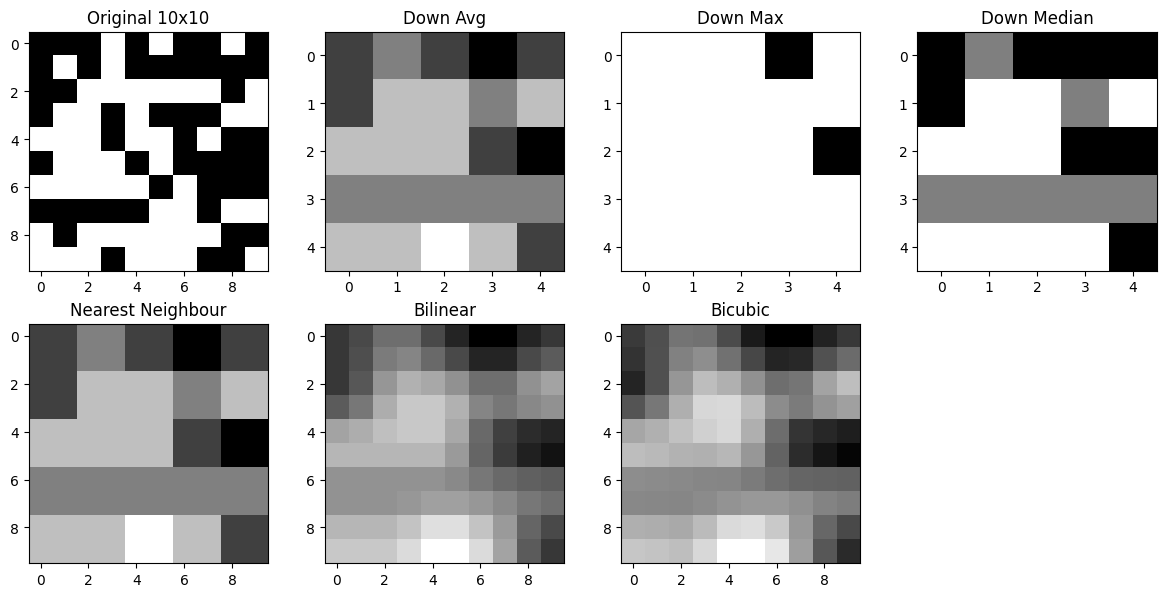

In [32]:
plt.figure(figsize=(12, 6))

# Show original image
plt.subplot(2, 4, 1)
plt.imshow(img_blackwhite, cmap='gray')
plt.title("Original 10x10")

# Show downsampled results (row 1)
plt.subplot(2, 4, 2); plt.imshow(down_avg, cmap='gray'); plt.title("Down Avg")
plt.subplot(2, 4, 3); plt.imshow(down_max, cmap='gray'); plt.title("Down Max")
plt.subplot(2, 4, 4); plt.imshow(down_median, cmap='gray'); plt.title("Down Median")

# Show upsampled results (row 2)
plt.subplot(2, 4, 5); plt.imshow(up_nn, cmap='gray'); plt.title("Nearest Neighbour")
plt.subplot(2, 4, 6); plt.imshow(up_bilinear, cmap='gray'); plt.title("Bilinear")
plt.subplot(2, 4, 7); plt.imshow(up_bicubic, cmap='gray'); plt.title("Bicubic")

plt.tight_layout()
plt.show()
